# Deep Computer Vision
This tutorial will do image classification and object detection / recognition using deep computer vision, using a Convolutional Neural Network (CNN).  We will be using image data as our features and a label for those images as our label or output

## Image Data
The images will have 3 dimensions: height, width, color channels
We will use the [CIFAR Image Dataset](https://www.cs.toronto.edu/%7Ekriz/cifar.html).

## Convolutional Neural Networks
CNNs are made up of convolutional layers rather than dense layers, their goal is to find patterns from within images that can be used to classify the image or parts of it.  The fundamental difference between conv and dense layers is that **dense layers detect patterns globally while conv layers detect patterns locally.**

### Creating a convnet

In [16]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load and Split dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 10s 0us/step


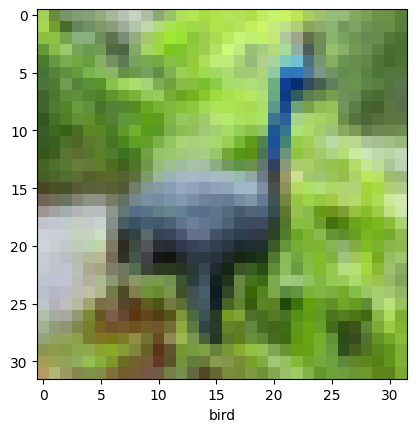

In [7]:
# Look at one image
IMG_INDEX = 6 # change this to look at other images

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

## Build CNN Architecture
A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few densely connected layers.  The idea is that the stack of conv and maxPool layers extract the features from the image, then these features are flattened and fed to densely connected layers that determine the image class based on the presence of features.

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2,)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

2024-02-18 11:36:09.985699: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-18 11:36:10.320615: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-18 11:36:10.320657: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-18 11:36:10.323485: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-18 11:36:10.323542: I external/local_xla/xla/stream_executor

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

## Adding Dense Layers
Here is where we take the features extracted by the CNN and classify them.

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

We can see that the flatten layer changes the shape of our data so that we can feed it to the 64 node dense layer, followed by the final output layer of 10 neurons (one for each class).

## Training
Now we will train and compile the model using the recommended hyperparameters from tensorflow.  *This will take much longer than the previous models.*

In [13]:
model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10


2024-02-18 12:09:21.120658: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-18 12:09:22.250744: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fc2703366b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-18 12:09:22.250778: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti, Compute Capability 8.9
2024-02-18 12:09:22.293744: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708286962.549590    2909 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 [==============================] - 15s 7ms/step - loss: 1.5206 - accuracy: 0.4458 - val_loss: 1.2555 - val_accuracy: 0.5484
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1558 - accuracy: 0.5901 - val_loss: 1.0593 - val_accuracy: 0.6297
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0184 - accuracy: 0.6457 - val_loss: 0.9730 - val_accuracy: 0.6555
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9237 - accuracy: 0.6758 - val_loss: 0.9609 - val_accuracy: 0.6647
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8513 - accuracy: 0.7019 - val_loss: 0.9206 - val_accuracy: 0.6809
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7952 - accuracy: 0.7228 - val_loss: 0.8735 - val_accuracy: 0.6949
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7484 - accuracy: 0.7388 - val_loss: 0.8722 - val_accuracy: 0.7030
E

Pick a number: 1
1/1 [==============================] - 0s 13ms/step


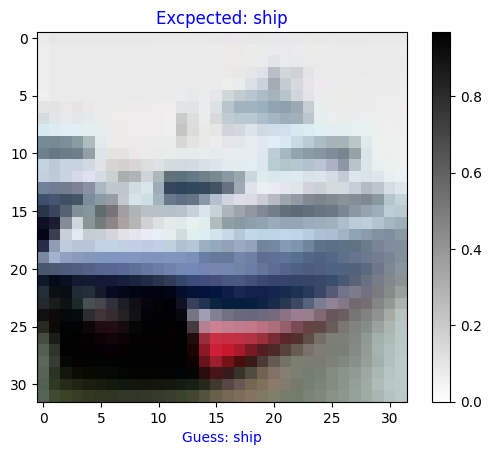

In [27]:
COLOR = 'blue'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num][0]
predict(model, image, label)

Pick a number: 99
1/1 [==============================] - 0s 13ms/step


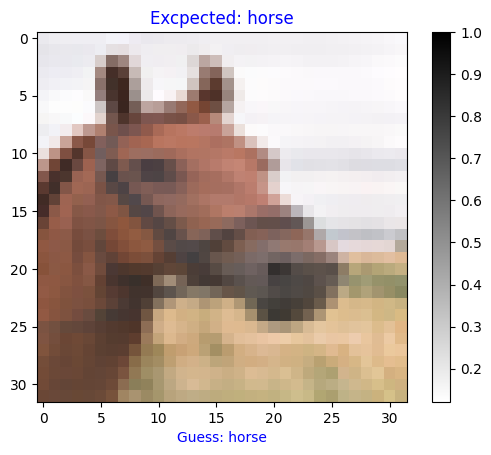

In [31]:
num = get_number()
image = test_images[num]
label = test_labels[num][0]
predict(model, image, label)

## Working with Small Datasets
In the situation where you don't have millions of images it is difficult to train a CNN from scratch that performs very well.  Here are some techniques to deal with this.

In [32]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

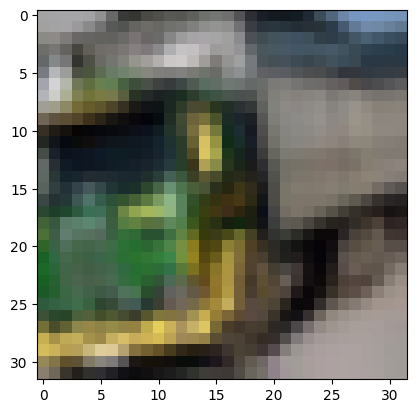

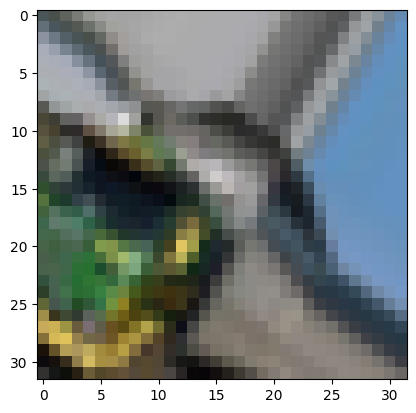

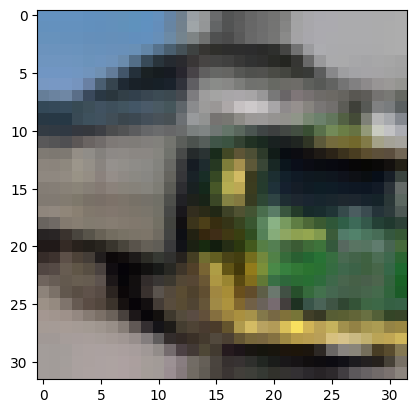

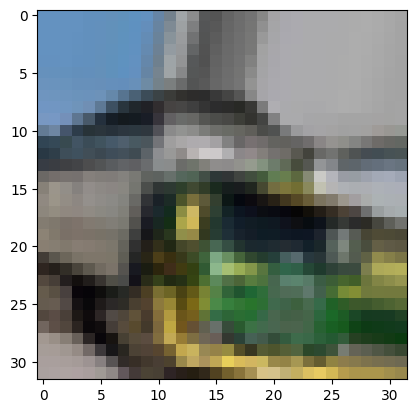

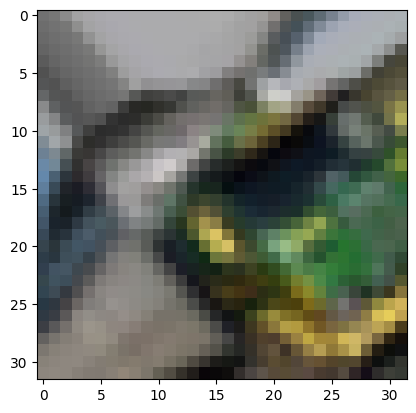

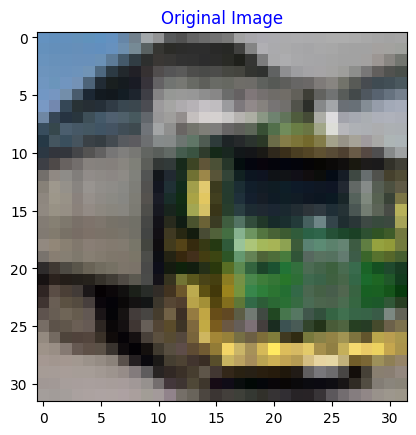

In [42]:
# creates a data generator object that transforms images
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# pick an image to transform
test_img = train_images[14]
img = image.img_to_array(test_img)
img = img.reshape((1,) + img.shape)

i = 0



for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4: # only show 4 images
        break
        
plt.figure(5)
plot = plt.imshow(test_img)
plt.title("Original Image")
plt.show()        

## Pretrained Models
You can use pretrained CNNs as a part of your own custom network rather than training everything brand new from scratch.

When doing this, you usually want to "fine-tune" the pretrained model to better fit your specific application.  This involves not touching or retraining the earlier layers in the convolutional base, but only adjusting the final few.

*This tutorial is based on [this TensorFlow documentation](https://www.tensorflow.org/tutorials/images/transfer_learning)

In [43]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

## Dataset
We will load cats_vs_dogs dataset from tensorflow_datasets.  This dataset contains (image, label) pairs where images have different dimensions and 3 color channels.

In [45]:
import tensorflow_datasets as tfds

# split the data manually into 80% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True
)

/home/masonc/ai_learning/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-02-18 14:10:26.217471: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:   0%|                                                                          | 0/1 [00:02<?, ? url/s]


Dl Completed...:   0%|                                                                          | 0/1 [00:03<?, ? url/s]


Dl Completed...:   0%|                                                                          | 0/1 [00:06<?, ? url/s]


Dl Completed...:   0%|                                                                          | 0/1 [00:11<?, ? url/s]


Dl Completed...:   0%|                                                                          | 0/1 [00:14<?, ? url/s]


Dl Completed...:   0%|                                                                          | 0/1 [00:17<?, ? url/s]


Dl Completed...:   0%|                                                                          | 0/1 [00:20<?, ? url/s]


Dl Completed...:   0%|                                                                          | 0/1 [00:22<?, ? url/s]


Dl Completed...:   0%|                                                                          | 0/1 [00:25<?, ? url/s]


Dl Completed...:   0%|                                                                          | 0/1 [00:27<?, ? url/s]


Dl Completed...:   0%|                                                                          | 0/1 [00:29<?, ? url/s]


Dl Completed...:   0%|                                                                          | 0/1 [00:31<?, ? url/s]


Generating train examples...:   8%|███                                     | 1783/23262 [00:03<00:35, 606.43 examples/s]Corrupt JPEG data: 239 extraneous bytes before marker 0xd9

Generating train examples...:  10%|████▏                                   | 2411/23262 [00:04<00:33, 614.61 examples/s]Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9

Generating train examples...:  32%|████████████▊                           | 7481/23262 [00:12<00:25, 627.19 examples/s]Corrupt JPEG data: 99 extraneous bytes before marker 0xd9

Generating train examples...:  38%|███████████████                         | 8744/23262 [00:14<00:23, 621.56 examples/s]Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9

Generating train examples...:  59%|██████████████████████▉                | 13679/23262 [00:22<00:16, 591.40 examples/s]Corrupt JPEG data: 396 extraneous bytes before marker 0xd9

Generating train examples...:  69%|██████


Generating train examples...:  89%|██████████████████████████████████▋    | 20711/23262 [00:34<00:04, 579.96 examples/s]Corrupt JPEG data: 65 extraneous bytes before marker 0xd9

Generating train examples...:  99%|██████████████████████████████████████▍| 22957/23262 [00:39<00:00, 437.52 examples/s]WARNING:absl:1738 images were corrupted and were skipped

                                                                                                                        
Shuffling /home/masonc/tensorflow_datasets/cats_vs_dogs/4.0.1.incomplete6VK0FV/cats_vs_dogs-train.tfrecord*...:   0%| | 
Shuffling /home/masonc/tensorflow_datasets/cats_vs_dogs/4.0.1.incomplete6VK0FV/cats_vs_dogs-train.tfrecord*...:   6%| | 
Shuffling /home/masonc/tensorflow_datasets/cats_vs_dogs/4.0.1.incomplete6VK0FV/cats_vs_dogs-train.tfrecord*...:  13%|▏| 
Shuffling /home/masonc/tensorflow_datasets/cats_vs_dogs/4.0.1.incomplete6VK0FV/cats_vs_dogs-train.tfrecord*...:  19%|▏| 
Shuffling /home/masonc/tensorflow_dat

Dataset cats_vs_dogs downloaded and prepared to /home/masonc/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


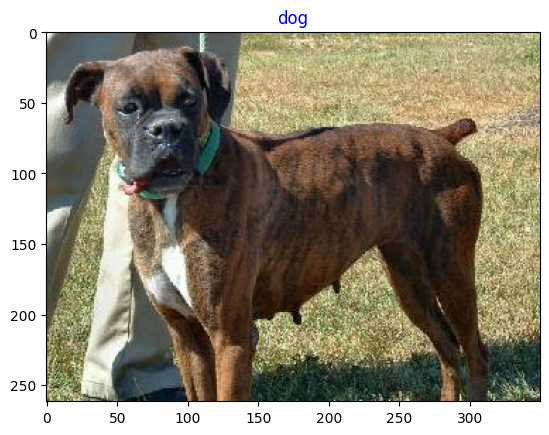

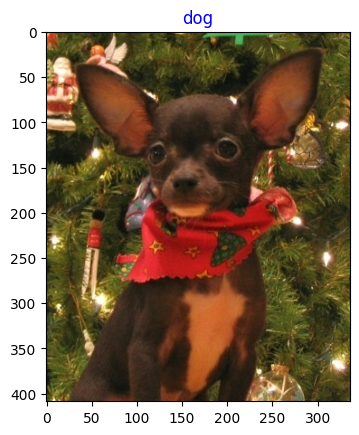

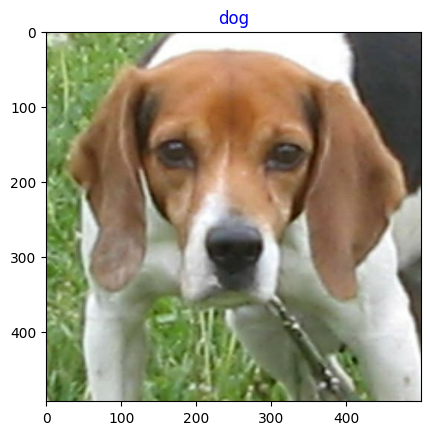

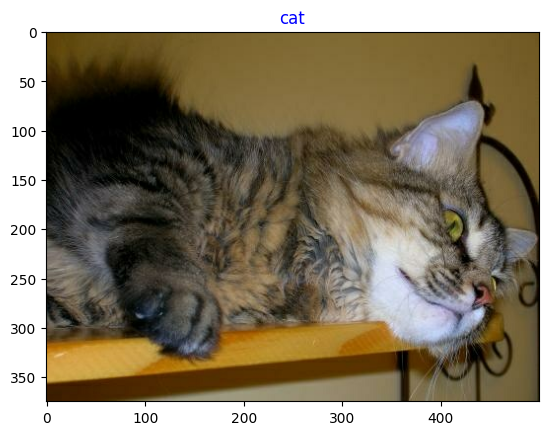

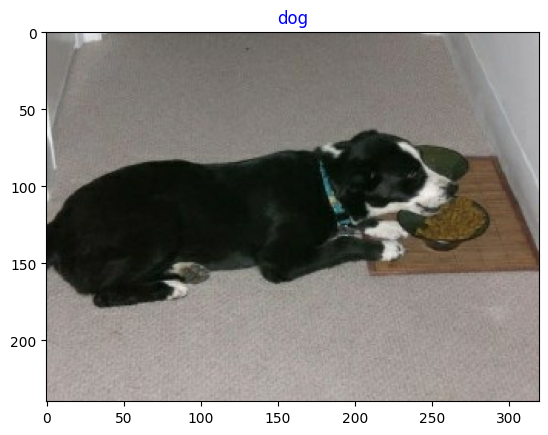

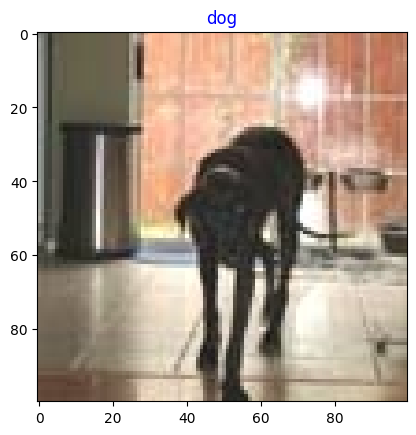

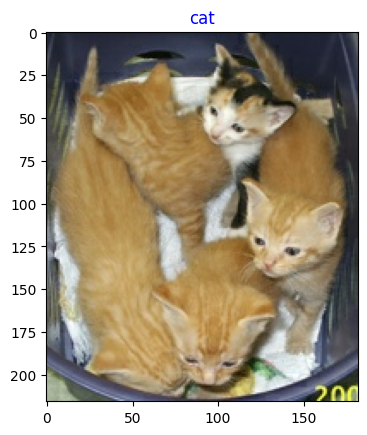

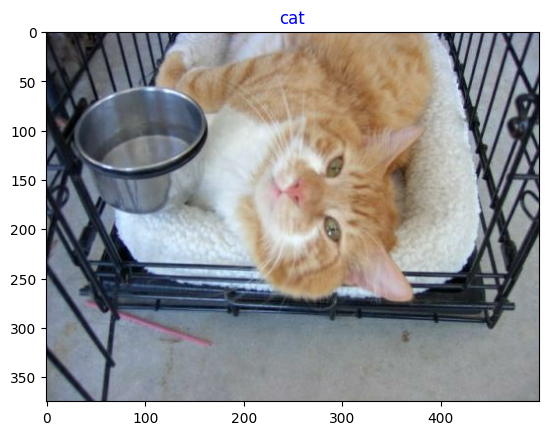

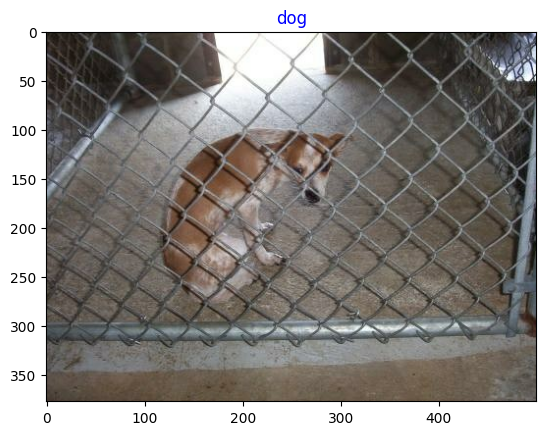

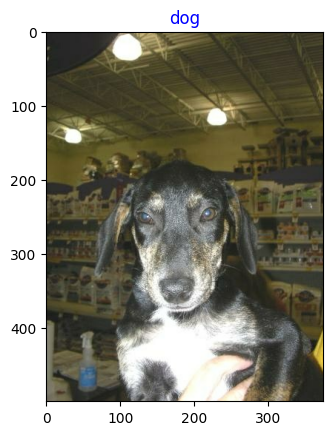

In [48]:
get_label_name = metadata.features['label'].int2str # creates a function object we can use to get labels

for image, label in raw_train.take(10):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

## Data Preprocessing
Since our sizes are all different, we need to convert them to be the same size.  We can write a fn to do that for us below:

In [84]:
IMG_SIZE = 160

def format_example(image, label):
    """
    returns an image that is reshaped to IMG_SIZE
    """
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

def de_normalize_example(image):
    return tf.cast(((image + 1) * 127.5), tf.uint8)

In [73]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

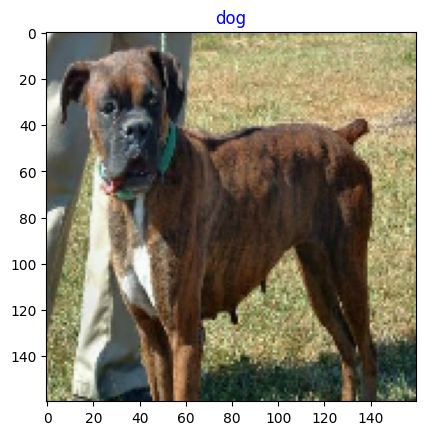

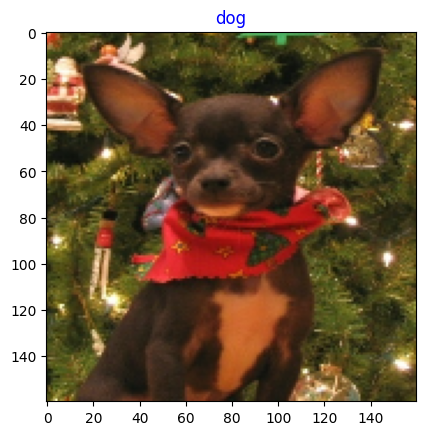

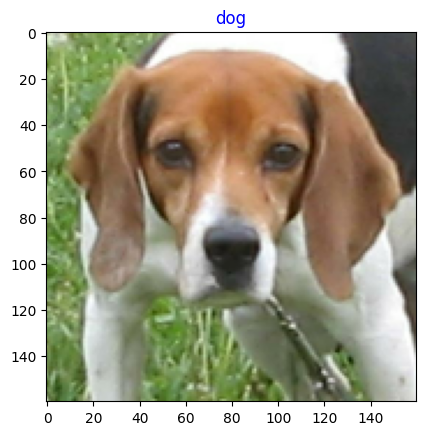

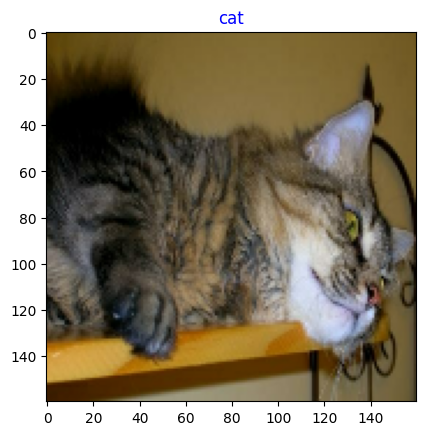

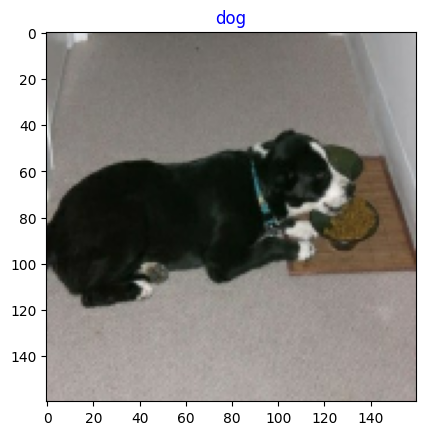

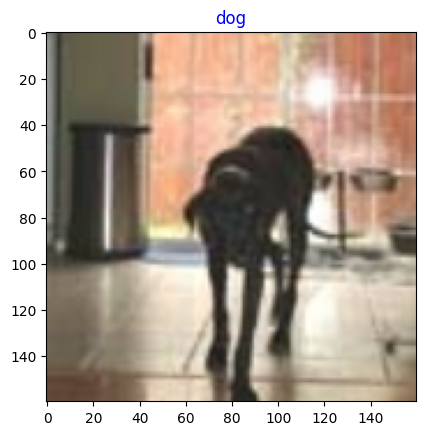

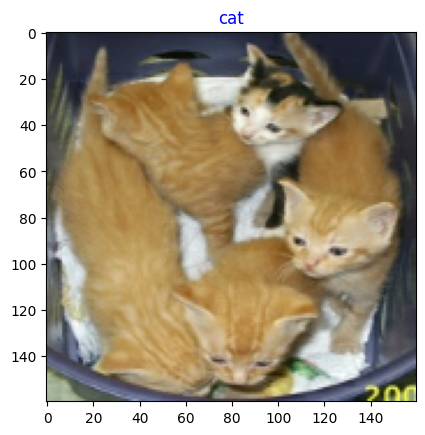

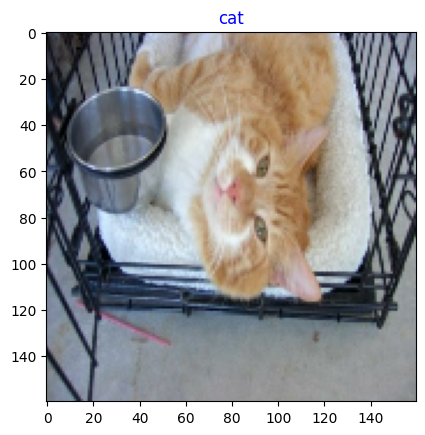

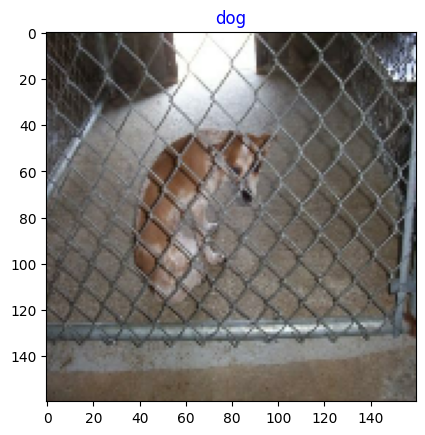

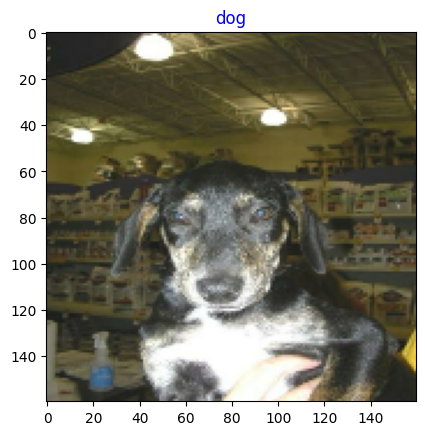

In [85]:
for image, label in train.take(10):
    plt.figure()
    plt.imshow(de_normalize_example(image))
    plt.title(get_label_name(label))

In [89]:
for img, label in raw_train.take(2):
    print(f"Original Shape: {img.shape}")
for img, label in train.take(2):
    print(f"New shape: {img.shape}")

Original Shape: (262, 350, 3)
Original Shape: (409, 336, 3)
New shape: (160, 160, 3)
New shape: (160, 160, 3)


## Picking a Pretrained Model
The model we are going to use as the convolutional base for our model is **MobileNet V2** developed at Google.  We want to use this model but only its convolutional base.  So when we load in the model we'll specify that we don't want to load the top (classification) layer.  We'll tell the model what input shape to expect and to use the predetermined weights fgrom *imagenet*

In [90]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [91]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

 block_3_expand_relu (ReLU)  (None, 40, 40, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 41, 41, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 20, 20, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 20, 20, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 10, 10, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 10, 10, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 10, 10, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 10, 10, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 10, 10, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 10, 10, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 10, 10, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 10, 10, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 10, 10, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 11, 11, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 5, 5, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 5, 5, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 5, 5, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 5, 5, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

## Freezing the Base
The term *freezing* refers to disabling the training property of a layer.  It simply means we won't make any changes to the weights of any layers that are frozen during training.  This is important as we don't want to change the convolutional base that already has learned weights.

In [92]:
base_model.trainable = False

In [93]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

 block_3_expand_relu (ReLU)  (None, 40, 40, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 41, 41, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 20, 20, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 20, 20, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 10, 10, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 10, 10, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 10, 10, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 10, 10, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 10, 10, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 10, 10, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 10, 10, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 10, 10, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 10, 10, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 11, 11, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 5, 5, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 5, 5, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 5, 5, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 5, 5, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

## Adding our Classifier
Now that we have our base layer set up we can add the classifier.  Instead of flattening the feature map of the base layer we will use a global average pooling layer that will average the entire 5x5 area of each 2D feature map and return to us a single 1280 element vector per filter.  After that, we will ad the prediction layer that will be a single dense neuron.  We can do this because we only have two classes to predict for.

In [95]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = keras.layers.Dense(1)

In [96]:
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [98]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [100]:
# We can evaluate it now to see how it does before we provide new images
initial_epochs = 3
validation_steps = 20
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

loss0, accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 4s 35ms/step - loss: 0.8834 - accuracy: 0.4297


In [102]:
# now we can train our images
history = model.fit(train_batches, epochs=initial_epochs, validation_data=validation_batches)
acc = history.history['accuracy']
print(acc)

Epoch 1/3
582/582 [==============================] - 16s 26ms/step - loss: 0.0537 - accuracy: 0.9800 - val_loss: 0.0540 - val_accuracy: 0.9794
Epoch 2/3
582/582 [==============================] - 15s 26ms/step - loss: 0.0500 - accuracy: 0.9815 - val_loss: 0.0513 - val_accuracy: 0.9815
Epoch 3/3
582/582 [==============================] - 15s 26ms/step - loss: 0.0475 - accuracy: 0.9827 - val_loss: 0.0497 - val_accuracy: 0.9807
[0.9799569845199585, 0.9814615845680237, 0.9826974868774414]


In [104]:
model.save("dogs_vs_cats.keras")
new_model = tf.keras.models.load_model("dogs_vs_cats.keras")